In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 飞行模拟器数据处理-老数据

#### 读取inf文件，里面包含了各种数据说明

In [4]:
def b2i(bstr, s = 'h'):
    """convert byte string to numerical array"""    
    import struct
    return 'not even' if len(bstr)%2!=0 else [struct.unpack(s, 
           bstr[2*i:2*i+2])[0] for i in range(len(bstr)//2)]


def read_inf(inf): 
    """convert .INF to a dict, simple and enough to represent inf data 296
    inf =    record
    HeatedPattern  : char; # 0 1
    fly            : string[20]; 
    date,DayTime   : string[40]; # 23-39, 64-77
    remarks        : string[80]; 
    ExpType        : array[1..15] of str4; # 186-189 test, 191 4+1
    duration      : array[1..15] of integer;
    NofRecs,NofData,NofFiles: integer;
    ['Â', 8, 'f', 'l', 'y', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 'M', 'o', 'n', 'd', 'a', 'y', ' ', '2', '1', ' ', 'A', 'p', 'r', 'i', 'l', ' ', '2', '0', '1', '4', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, '2', '1', ' ', 'h', ' ', '4', '5', ' ', 'm', ' ', '4', '6', ' ', 's', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 'r', 'e', 'm', 'a', 'r', 'k', 's', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', 't', 'r', ' ', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', ' ', ' ', ' ', 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 15, 0, 30, 0, 60, 0, 'Z', 0, 'x', 0, 0, 0, 'x', 0, 'x', 0, 'x', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, '4', 8, 2, 0]
    ['Â', 8, 'f', 'l', 'y', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 'M', 'o', 'n', 'd', 'a', 'y', ' ', '2', '1', ' ', 'A', 'p', 'r', 'i', 'l', ' ', '2', '0', '1', '4', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, '2', '1', ' ', 'h', ' ', '4', '9', ' ', 'm', ' ', '2', '5', ' ', 's', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 'r', 'e', 'm', 'a', 'r', 'k', 's', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', 't', 'r', ' ', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', ' ', ' ', ' ', 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 15, 0, 30, 0, 60, 0, 'Z', 0, 'x', 0, 0, 0, 'x', 0, 'x', 0, 'x', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 'h', 16, 2, 0]
    2014年4月22日18:03:25 8 backspace  maybe avoid odd bytes                       14 20 DC4 (device control 1)                                                                                                                                              14 shift out                                                                                                                                           12 new page form feed                                                                                                                                                                                                                                                         end of transmission                                                                                                                                                                                                                                                                                                                                so integer = byte2*2**8+byte1    'Z' = 90 'x' =120     NofRec(s/m+15+30+60,90+120) NofData '4' =52, 'h'=104  NofFile:a,b                                         
    """
    def detr(d, tr = 0):
        """ remove all the trailing tr from list d:"""
        while d[-1]== tr:
            d.pop()
        return d

    with open(inf, 'rb') as f:
        inf = f.read()
    return{'HeatedPattern': inf[0], #'upright'if inf[0]==194 ┬,else 'UpsideDown',# char
           'fly':inf[2:22].decode('ascii'), # string[20]; @1: 8 BS backspace
           'date':inf[23:63].decode('ascii'), # string[40] @22: 20 DC4 (device control 1) 
           'DayTime': inf[64:104].decode('ascii'), # string[40] @63: 14 SO shift out 
           'remarks':inf[105:185].decode('ascii'), # string[80]  ##  @104: 12  FF (NP form feed, new page)
           'ExpType':[i.decode('ascii') for i in inf[185:260].split(b'\x04') if not i.decode('ascii') in ('',' '*4)], # array[1..15] of str4; +75 @185,190,..: each start with 4 EOT (end of transmission)
           'duration': detr(b2i(inf[260:290])),#array[1..15] of integer;
           'NofRecs':b2i(inf[290:292])[0],#integer
           'NofData': b2i(inf[292:294])[0], #integer
           'NofFiles': b2i(inf[294:296])[0]} #integer

In [5]:
l = read_inf("0914Y01A.INF")

#### inf文件配置说明

- HeatedPattern=194表示正T惩罚，否则表示倒T惩罚
- ExpType表示实验序列
- duration表示实验序列对应时间
- date表示实验日期

In [6]:
l

{'DayTime': '9 h 45 m 34 s\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'ExpType': ['test',
  'test',
  ' tr ',
  ' tr ',
  'test',
  ' tr ',
  ' tr ',
  'test',
  'test'],
 'HeatedPattern': 194,
 'NofData': 7200,
 'NofFiles': 3,
 'NofRecs': 6,
 'date': 'Thursday 14 September 2017\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'duration': [120, 120, 120, 120, 120, 120, 120, 120, 120],
 'fly': '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'remarks': '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'}

#### <br>
<br>
#### 读取DTA文件

说明:

- 文件分为ABC三个部分，每个部分数据14412
- 位置信号分为四个部分(-512,512),(512,1536),(1536,2048),(-2048,512),其中2048和-2048重合

<br>
数据排列方式如下:

|T|P|T|P|T|P|
|-|-|-|-|-|-|
|0-1201|1202-2401|2402-3603|3604-4803|4804-6005|6006-7205|
|T|P|T|P|T|P|
|7206-8407|8408-9607|9608-10809|10810-12009|12010-13211|13212-14411|



In [7]:
def read_dta(dta):
    """read the dta file and return numerical array"""
    with open(dta, 'rb') as f:
        data  = f.read()
    return b2i(data)

In [8]:
data = read_dta("0914Y01A.DTA")

In [9]:
print(data[-100:])

[-1201, -1201, -1187, -1150, -1093, -1046, -1031, -1030, -1030, -1030, -1026, -1002, -998, -998, -1004, -1070, -1122, -1176, -1228, -1244, -1221, -1096, -920, -725, -583, -416, -278, -163, -57, 4, 9, 9, 17, 129, 243, 375, 420, 439, 449, 470, 480, 496, 518, 556, 582, 644, 659, 624, 540, 523, 492, 458, 440, 397, 356, 299, 261, 245, 241, 209, 107, 37, 14, 13, -13, -114, -131, -154, -160, -162, -231, -359, -367, -367, -385, -439, -493, -523, -550, -562, -612, -648, -659, -690, -709, -708, -692, -669, -667, -667, -726, -784, -786, -768, -704, -691, -692, -642, -500, -470]


In [10]:
def PI(a, pt = 194): 
    """calculate PI from data list,194 punishment with T"""
    PI_index_Up_1 = 0
    PI_index_Down_1 = 0
    PI_index_Up_2 = 0
    PI_index_Down_2 = 0
    PI_index_Up_3 = 0
    PI_index_Down_3 = 0
    
    for i in range(1202,2402):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_1+=1
        else:
            PI_index_Down_1+=1
    for i in range(3604,4804):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_1+=1
        else:
            PI_index_Down_1+=1
    
    for i in range(6006,7206):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_2+=1
        else:
            PI_index_Down_2+=1
    for i in range(8408,9608):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_2+=1
        else:
            PI_index_Down_2+=1
    
    for i in range(10810,12010):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_3+=1
        else:
            PI_index_Down_3+=1
    for i in range(13212,14412):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_3+=1
        else:
            PI_index_Down_3+=1
    
    if pt==194:
        PI_1 = (PI_index_Up_1-PI_index_Down_1)/(PI_index_Up_1+PI_index_Down_1)
        PI_2 = (PI_index_Up_2-PI_index_Down_2)/(PI_index_Up_2+PI_index_Down_2)
        PI_3 = (PI_index_Up_3-PI_index_Down_3)/(PI_index_Up_3+PI_index_Down_3)
    else:
        PI_1 = -(PI_index_Up_1-PI_index_Down_1)/(PI_index_Up_1+PI_index_Down_1)
        PI_2 = -(PI_index_Up_2-PI_index_Down_2)/(PI_index_Up_2+PI_index_Down_2)
        PI_3 = -(PI_index_Up_3-PI_index_Down_3)/(PI_index_Up_3+PI_index_Down_3)
    return [PI_1,PI_2,PI_3]
        

In [41]:
def getALLPI(fileA,fileB,fileC):
    dataA = read_dta(fileA)
    dataB = read_dta(fileB)
    dataC = read_dta(fileC)
    all_PI = []
    for i in PI(dataA):
        all_PI.append(i)
    for i in PI(dataB):
        all_PI.append(i)
    for i in PI(dataC):
        all_PI.append(i)
    return all_PI

In [43]:
fileA = '0914Y01A.DTA'
fileB = '0914Y01B.DTA'
fileC = '0914Y01C.DTA'
print(getALLPI(fileA,fileB,fileC))

[0.5916666666666667, -0.14916666666666667, 0.6816666666666666, 0.35833333333333334, 0.07333333333333333, 0.17166666666666666, 0.15583333333333332, 0.018333333333333333, 0.0575]


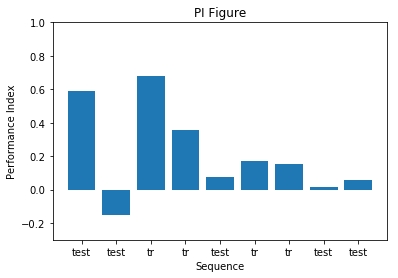

In [13]:
import matplotlib.pyplot as plt
name_list = ['test','test','tr','tr','test','tr','tr','test','test']
num_list = [0.5916666666666667, -0.14916666666666667, 0.6816666666666666, 0.35833333333333334, 0.07333333333333333, 0.17166666666666666, 0.15583333333333332, 0.018333333333333333, 0.0575]

plt.bar(range(len(num_list)), num_list,tick_label=name_list)
plt.xlabel("Sequence")
plt.ylabel("Performance Index")
plt.title("PI Figure")
plt.ylim(-0.3,1)
#plt.errorbar([i for i in range(9)],num_list,yerr=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],fmt="*",color="yellow")
plt.show()




#### 计算PI

软件结果:
![PIimg](images/PI.jpG)

脚本计算结果:
```
[0.5916666666666667, -0.14916666666666667, 0.6816666666666666, 0.35833333333333334, 0.07333333333333333, 0.17166666666666666, 0.15583333333333332, 0.018333333333333333, 0.0575]
```

## 多数据统计

In [14]:
class DataAnalysis:
    def __init__(self,dataDir):
        self.dataDir = dataDir
    

In [15]:
import os
from os.path import join
AllFile = []
dest = "f:\data\data"
for root, dirs, files in os.walk( dest ):
    for OneFileName in files :
        OneFullFileName = join( root, OneFileName )
        AllFile.append(OneFullFileName)
    print(AllFile)

['f:\\data\\data\\0914Y01A.DTA', 'f:\\data\\data\\0914Y01A.INF', 'f:\\data\\data\\0914Y01B.DTA', 'f:\\data\\data\\0914Y01B.INF', 'f:\\data\\data\\0914Y01C.DTA', 'f:\\data\\data\\0914Y01C.INF', 'f:\\data\\data\\0914Y02A.DTA', 'f:\\data\\data\\0914Y02A.INF', 'f:\\data\\data\\0914Y02B.DTA', 'f:\\data\\data\\0914Y02B.INF', 'f:\\data\\data\\0914Y02C.DTA', 'f:\\data\\data\\0914Y02C.INF']


In [16]:
for i in AllFile:
    print(i)

f:\data\data\0914Y01A.DTA
f:\data\data\0914Y01A.INF
f:\data\data\0914Y01B.DTA
f:\data\data\0914Y01B.INF
f:\data\data\0914Y01C.DTA
f:\data\data\0914Y01C.INF
f:\data\data\0914Y02A.DTA
f:\data\data\0914Y02A.INF
f:\data\data\0914Y02B.DTA
f:\data\data\0914Y02B.INF
f:\data\data\0914Y02C.DTA
f:\data\data\0914Y02C.INF


In [33]:
def getFirtFile(fileName):
    firstDataFile = []
    for i in fileName:
        if(i[-5:]=="A.DTA"):
            firstDataFile.append(i)
    return firstDataFile

In [34]:
firstDataFile = getFirtFile(AllFile)

In [37]:
def strReplace(s,replacedStr):
    tmp=list(s)
    tmp[-5]=replacedStr
    s=''.join(tmp)
    return s

In [44]:
PIs = []
for detialItem in firstDataFile:
    PIs.append(getALLPI(detialItem,strReplace(detialItem,"B"),strReplace(detialItem,"C")))

In [46]:
PIs[1]

[-0.305,
 -0.09166666666666666,
 -0.3466666666666667,
 -0.4575,
 0.1825,
 -0.2841666666666667,
 -0.7533333333333333,
 -0.5108333333333334,
 -0.23416666666666666]

In [48]:
PIs[0]

[0.5916666666666667,
 -0.14916666666666667,
 0.6816666666666666,
 0.35833333333333334,
 0.07333333333333333,
 0.17166666666666666,
 0.15583333333333332,
 0.018333333333333333,
 0.0575]

In [63]:
import numpy as np
import pandas as pd
def getMeanAndSEM(dataList):
    data = {i:dataList[i] for i in range(len(dataList))}
    pdData = pd.DataFrame(data)
    return pdData

In [68]:
data = {i:PIs[i] for i in range(len(PIs))}
pdData = pd.DataFrame(data)
pdData

,0,1
0,0.591667,-0.305000
1,-0.149167,-0.091667
2,0.681667,-0.346667
3,0.358333,-0.457500
4,0.073333,0.182500
5,0.171667,-0.284167
6,0.155833,-0.753333
7,0.018333,-0.510833
8,0.057500,-0.234167


In [72]:
s = pdData.T.describe()

In [73]:
s

,0,1,2,3,4,5,6,7,8
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.143333,-0.120417,0.167500,-0.049583,0.127917,-0.056250,-0.298750,-0.246250,-0.088333
std,0.634039,0.040659,0.727141,0.576881,0.077192,0.322323,0.642878,0.374177,0.206239
min,-0.305000,-0.149167,-0.346667,-0.457500,0.073333,-0.284167,-0.753333,-0.510833,-0.234167
25%,-0.080833,-0.134792,-0.089583,-0.253542,0.100625,-0.170208,-0.526042,-0.378542,-0.161250
50%,0.143333,-0.120417,0.167500,-0.049583,0.127917,-0.056250,-0.298750,-0.246250,-0.088333
75%,0.367500,-0.106042,0.424583,0.154375,0.155208,0.057708,-0.071458,-0.113958,-0.015417
max,0.591667,-0.091667,0.681667,0.358333,0.182500,0.171667,0.155833,0.018333,0.057500


In [77]:
s.iloc[0,0]

2.0

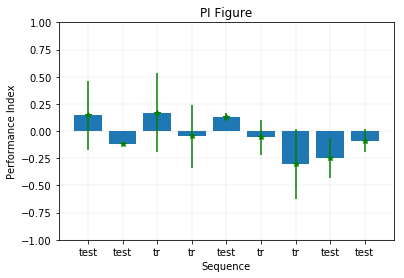

In [104]:
import matplotlib.pyplot as plt
name_list = ['test','test','tr','tr','test','tr','tr','test','test']
num_list = s.loc["mean"]
yerr = s.loc["std"]/s.iloc[0,0]

plt.bar(range(len(num_list)), num_list,tick_label=name_list)
plt.xlabel("Sequence")
plt.ylabel("Performance Index")
plt.title("PI Figure")
plt.ylim(-1,1)
plt.errorbar([i for i in range(9)],num_list,yerr=yerr,fmt="*",color="green")
plt.grid(color="grey",linewidth='0.1')
plt.show()


In [105]:
print(s.loc["mean"])
print(s.loc["std"]/s.iloc[0,0])

0    0.143333
1   -0.120417
2    0.167500
3   -0.049583
4    0.127917
5   -0.056250
6   -0.298750
7   -0.246250
8   -0.088333
Name: mean, dtype: float64
0    0.317020
1    0.020329
2    0.363571
3    0.288441
4    0.038596
5    0.161161
6    0.321439
7    0.187089
8    0.103120
Name: std, dtype: float64
